Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
#sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')

Reading Dataset

In [63]:
data0 = pd.read_excel('C:/Users/Administrator/Desktop/hammad/Customer Retension/storedata_total.xlsx')
data0.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


Information About Data

In [64]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30801 entries, 0 to 30800
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   custid      30781 non-null  object        
 1   retained    30801 non-null  int64         
 2   created     30781 non-null  datetime64[ns]
 3   firstorder  30781 non-null  object        
 4   lastorder   30781 non-null  object        
 5   esent       30801 non-null  int64         
 6   eopenrate   30801 non-null  float64       
 7   eclickrate  30801 non-null  float64       
 8   avgorder    30801 non-null  float64       
 9   ordfreq     30801 non-null  float64       
 10  paperless   30801 non-null  int64         
 11  refill      30801 non-null  int64         
 12  doorstep    30801 non-null  int64         
 13  favday      30801 non-null  object        
 14  city        30801 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 3.

Statistics of Dataset

In [65]:
data0.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep
count,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000
mean,0.794520,28.138405,25.554838,5.671139,61.873944,0.037729,0.649037,0.095094,0.038895
std,0.404059,16.751380,29.557106,10.561704,41.007588,0.103932,0.477279,0.293350,0.193347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,2.040816,0.000000,40.020000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,13.207547,0.000000,50.970000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,42.000000,40.000000,7.142857,74.280000,0.040816,1.000000,0.000000,0.000000
max,1.000000,291.000000,100.000000,100.000000,2600.140000,3.250000,1.000000,1.000000,1.000000


By looking at these statistics, we can gain insights into the distribution and characteristics of each variable. For example, we can see that the average customer in this sample has received 28 emails (esent), opens 25.6% of them (eopenrate), and clicks on 5.7% of them (eclickrate). We can also see that the average customer spends $61.87 (avgorder) per order and makes an order on average every 37.7 days (ordfreq). Additionally, we can see that the majority of customers have opted for paperless communication (paperless), while only a small fraction have opted for automatic prescription refills (refill) or home delivery of prescriptions (doorstep).

In [66]:
data0.isnull().sum()

custid        20
retained       0
created       20
firstorder    20
lastorder     20
esent          0
eopenrate      0
eclickrate     0
avgorder       0
ordfreq        0
paperless      0
refill         0
doorstep       0
favday         0
city           0
dtype: int64

This code fills missing values in a DataFrame using backward fill strategy, and modifies the original DataFrame in place.

In [67]:
data0.fillna(method='bfill',inplace=True)

In [68]:
data0.isnull().sum()

custid        0
retained      0
created       0
firstorder    0
lastorder     0
esent         0
eopenrate     0
eclickrate    0
avgorder      0
ordfreq       0
paperless     0
refill        0
doorstep      0
favday        0
city          0
dtype: int64

So we have now dataset with Zero Null Values 

In [69]:
data0.to_excel("C:/Users/Administrator/Desktop/hammad/Customer Retension/output.xlsx")

Reading Cleaned Dataset

In [70]:
data1 = pd.read_excel('C:/Users/Administrator/Desktop/hammad/Customer Retension/storedata_cleaned.xlsx')
data2 = data1.copy(deep=True) #copying dataset
data1.head()

,Unnamed: 0,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


Dropping Index

In [71]:
data1 = data1.drop(columns=['Unnamed: 0'],axis=1)

In [72]:
data1.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


Changing the columns into datetime

In [73]:
data1['firstorder']= data1.firstorder.astype('datetime64')
data1['lastorder'] = data1.lastorder.astype('datetime64')

Data information

In [74]:
data1.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep
count,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000
mean,0.794520,28.138405,25.554838,5.671139,61.873944,0.037729,0.649037,0.095094,0.038895
std,0.404059,16.751380,29.557106,10.561704,41.007588,0.103932,0.477279,0.293350,0.193347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,2.040816,0.000000,40.020000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,13.207547,0.000000,50.970000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,42.000000,40.000000,7.142857,74.280000,0.040816,1.000000,0.000000,0.000000
max,1.000000,291.000000,100.000000,100.000000,2600.140000,3.250000,1.000000,1.000000,1.000000


Summary of Dataset

The summary statistics provide information about the central tendency and dispersion of each variable in the dataset. For example, the mean of the "retained" column is 0.794520, indicating that the majority of customers in the dataset were retained. The standard deviation of the "avgorder" column is 41.007588, indicating that there is considerable variability in the average order amount among customers. The minimum and maximum values of each column are also provided, which can be useful for identifying outliers and understanding the range of values in the dataset. From min and max values of esent we came to know there is highly possibility outliners are present. Same for the avgorder and eclickrate

Data Information 

In [75]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30801 entries, 0 to 30800
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   custid      30801 non-null  object        
 1   retained    30801 non-null  int64         
 2   created     30801 non-null  datetime64[ns]
 3   firstorder  30801 non-null  datetime64[ns]
 4   lastorder   30801 non-null  datetime64[ns]
 5   esent       30801 non-null  int64         
 6   eopenrate   30801 non-null  float64       
 7   eclickrate  30801 non-null  float64       
 8   avgorder    30801 non-null  float64       
 9   ordfreq     30801 non-null  float64       
 10  paperless   30801 non-null  int64         
 11  refill      30801 non-null  int64         
 12  doorstep    30801 non-null  int64         
 13  favday      30801 non-null  object        
 14  city        30801 non-null  object        
dtypes: datetime64[ns](3), float64(4), int64(5), object(3)
memory usage: 3.

Now we have firstorder and lastorder are in datetime format

Data Distribution 

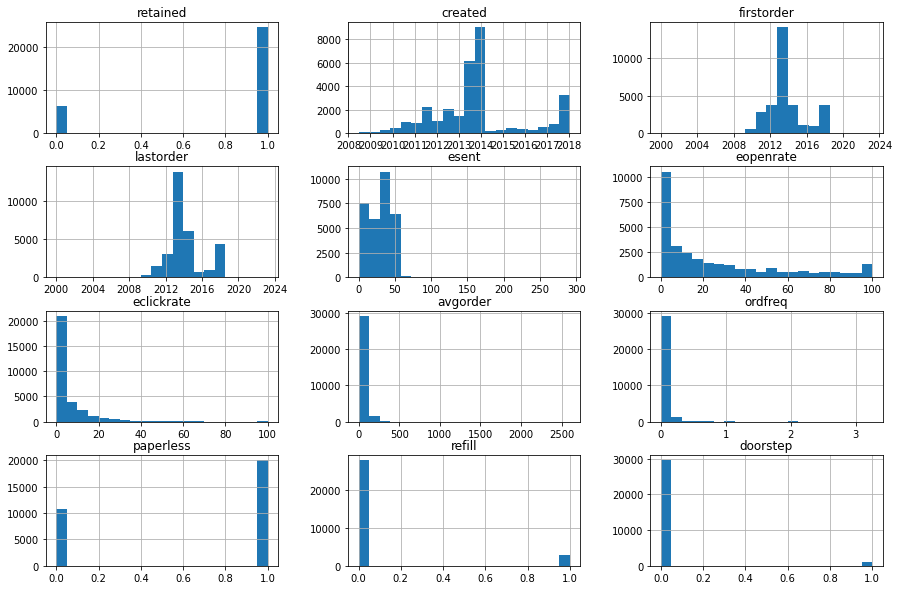

In [76]:
data1.hist(bins=20,figsize=(15,10))
plt.show()

 Specifically, it is calculating the number of days between various dates and storing the result in new columns.

In [77]:
data1['create_first'] = data1.firstorder - data1.created
data1['create_first'] = data1['create_first']/np.timedelta64(1,'D')
data1['first_last'] = data1.lastorder - data1.firstorder
data1['first_last'] = data1['first_last']/np.timedelta64(1,'D')

In [89]:
data1.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,create_first,first_last
0,6H6T6N,0,2012-09-28,2013-08-11,2013-08-11,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL,317.0,0.0
1,APCENR,1,2010-12-19,2011-04-01,2014-01-19,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL,103.0,1024.0
2,7UP6MS,0,2010-10-03,2010-12-01,2011-07-06,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL,59.0,217.0
3,7ZEW8G,0,2010-10-22,2011-03-28,2011-03-28,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM,157.0,0.0
4,8V726M,1,2010-11-27,2010-11-29,2013-01-28,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM,2.0,791.0


In [78]:
data1.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,create_first,first_last
count,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000
mean,0.794520,28.138405,25.554838,5.671139,61.873944,0.037729,0.649037,0.095094,0.038895,39.485471,89.371417
std,0.404059,16.751380,29.557106,10.561704,41.007588,0.103932,0.477279,0.293350,0.193347,162.604677,243.153228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5036.000000,-5000.000000
25%,1.000000,16.000000,2.040816,0.000000,40.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,13.207547,0.000000,50.970000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,42.000000,40.000000,7.142857,74.280000,0.040816,1.000000,0.000000,0.000000,22.000000,46.000000
max,1.000000,291.000000,100.000000,100.000000,2600.140000,3.250000,1.000000,1.000000,1.000000,2013.000000,3003.000000


 This plot shows the relationship between the number of days between the customer's account creation and their first order ('create_first') and the number of days between their first and last order ('first_last'). The scatter plot shows a positive correlation between these two variables, indicating that customers who place their first order soon after creating their account tend to have a shorter lifespan as a customer.

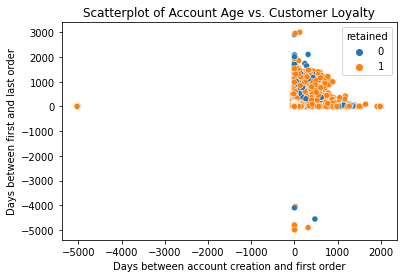

In [79]:
sns.scatterplot(x='create_first', y='first_last', data=data1, hue='retained')
plt.xlabel('Days between account creation and first order')
plt.ylabel('Days between first and last order')
plt.title('Scatterplot of Account Age vs. Customer Loyalty')
plt.show()


This plot shows the distribution of the number of days between a customer's first and last order. The histogram shows that the majority of customers place their last order within the first 100 days of their first order, indicating a relatively short customer lifespan.

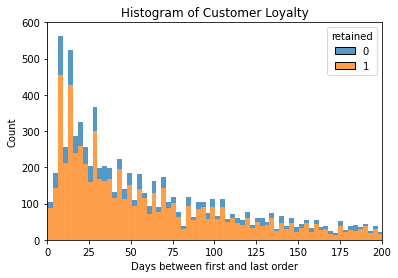

In [87]:
sns.histplot(x='first_last', data=data1, hue='retained', multiple='stack')
plt.xlabel('Days between first and last order')
plt.ylabel('Count')
plt.title('Histogram of Customer Loyalty')
plt.xlim(0, 200)
plt.ylim(0, 600)
plt.show()

Dropping Columns

In [18]:
data1 = data1.drop(['firstorder','lastorder','created','ordfreq'],axis=1)

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30801 entries, 0 to 30800
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   custid        30801 non-null  object 
 1   retained      30801 non-null  int64  
 2   esent         30801 non-null  int64  
 3   eopenrate     30801 non-null  float64
 4   eclickrate    30801 non-null  float64
 5   avgorder      30801 non-null  float64
 6   paperless     30801 non-null  int64  
 7   refill        30801 non-null  int64  
 8   doorstep      30801 non-null  int64  
 9   favday        30801 non-null  object 
 10  city          30801 non-null  object 
 11  create_first  30801 non-null  float64
 12  first_last    30801 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 3.1+ MB


Data Visualization

In [20]:
# Create new column 'total_engagement'
data2['total_engagement'] = data2['eopenrate'] + data2['eclickrate']

# Create new column 'order_value'
data2['order_value'] = data2['avgorder'] * data2['refill']


Distribution of Retention:

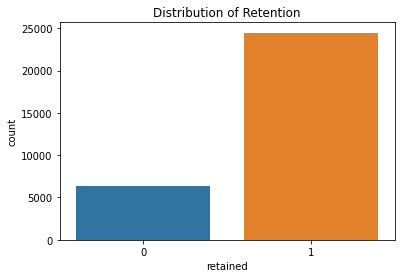

In [21]:
sns.countplot(x='retained', data=data2)
plt.title('Distribution of Retention')
plt.show()


Correlation Heatmap:

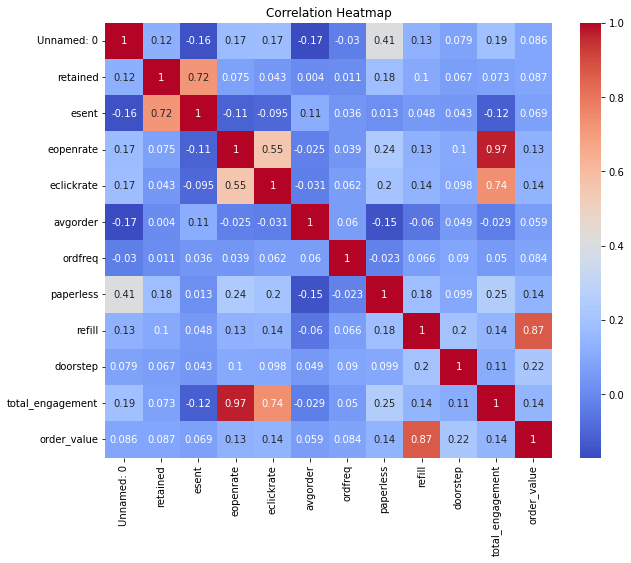

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Distribution of Total Engagement and Order Value:

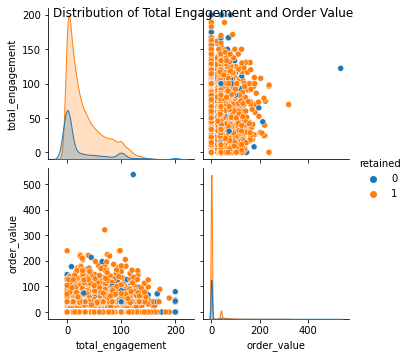

In [23]:
sns.pairplot(data=data2, vars=['total_engagement', 'order_value'], hue='retained')
plt.suptitle('Distribution of Total Engagement and Order Value')
plt.show()


Engagement by Favorite Day

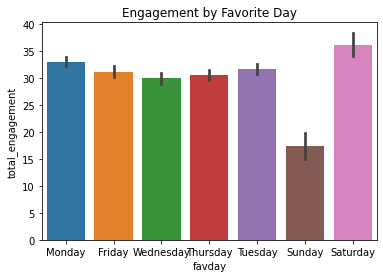

In [24]:
sns.barplot(x='favday', y='total_engagement', data=data2)
plt.title('Engagement by Favorite Day')
plt.show()


Order Value by Refill

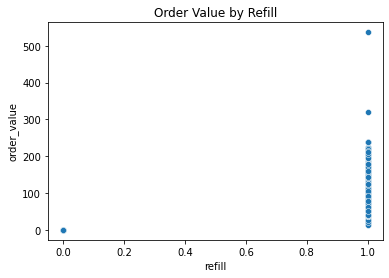

In [25]:
sns.scatterplot(x='refill', y='order_value', data=data2)
plt.title('Order Value by Refill')
plt.show()


Engagement by Paperless Billing:

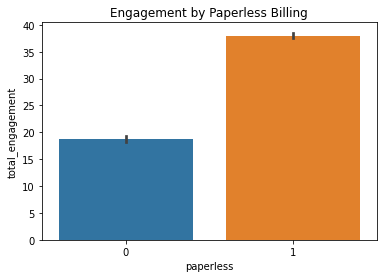

In [26]:
sns.barplot(x='paperless', y='total_engagement', data=data2)
plt.title('Engagement by Paperless Billing')
plt.show()


Click Rate by Refill:

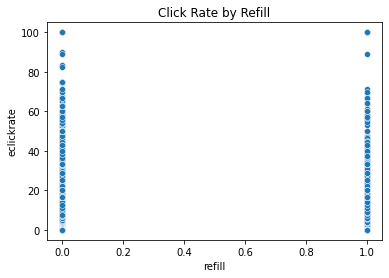

In [27]:
sns.scatterplot(x='refill', y='eclickrate', data=data2)
plt.title('Click Rate by Refill')
plt.show()


Order Value by City:

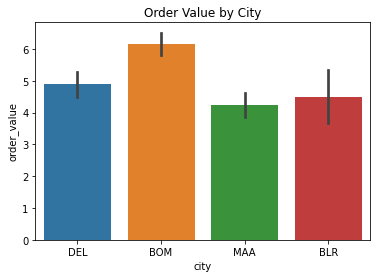

In [28]:
sns.barplot(x='city', y='order_value', data=data2)
plt.title('Order Value by City')
plt.show()


Retention by E-mail Open Rate:

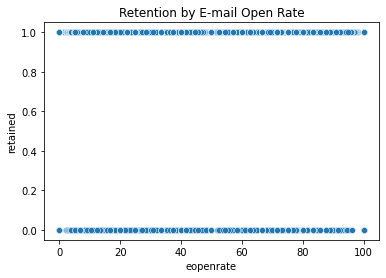

In [29]:
sns.scatterplot(x='eopenrate', y='retained', data=data2)
plt.title('Retention by E-mail Open Rate')
plt.show()


Engagement by Doorstep Delivery:

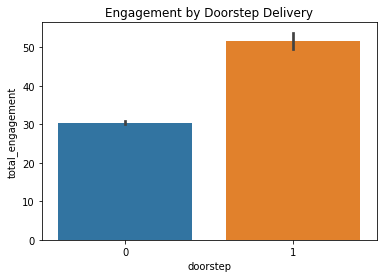

In [30]:
sns.barplot(x='doorstep', y='total_engagement', data=data2)
plt.title('Engagement by Doorstep Delivery')
plt.show()


Average Order Value by Favorite Day:

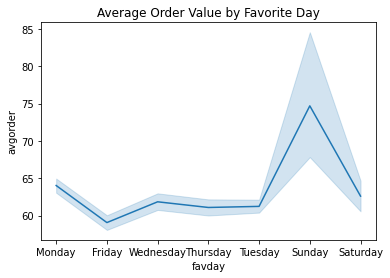

In [31]:
sns.lineplot(x='favday', y='avgorder', data=data2)
plt.title('Average Order Value by Favorite Day')
plt.show()


Engagement by City:

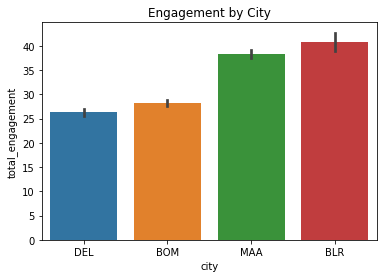

In [32]:
sns.barplot(x='city', y='total_engagement', data=data2)
plt.title('Engagement by City')
plt.show()


Paperless Delivery Rate by City:

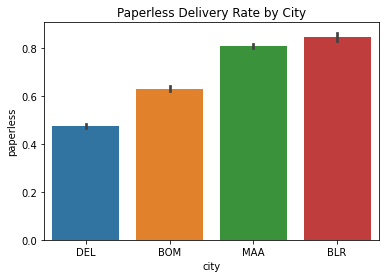

In [33]:
sns.barplot(x='city', y='paperless', data=data2)
plt.title('Paperless Delivery Rate by City')
plt.show()


Retention by Refill Status:

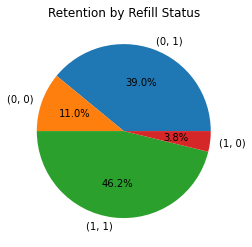

In [34]:
retained_by_refill = data2.groupby('refill')['retained'].value_counts(normalize=True)
plt.pie(retained_by_refill, labels=retained_by_refill.index, autopct='%1.1f%%')
plt.title('Retention by Refill Status')
plt.show()

Engagement by First and Last Purchase Date:

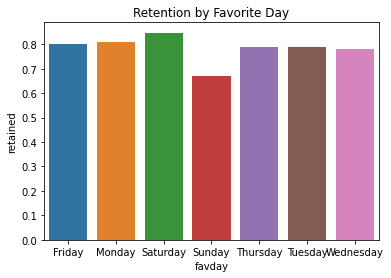

In [36]:
# Create a pivot table to calculate the retention rate by favday
pivot_table = pd.pivot_table(data2, values='retained', index='favday')

# Create a bar plot to visualize the pivot table
sns.barplot(x=pivot_table.index, y='retained', data=pivot_table)
plt.title('Retention by Favorite Day')
plt.show()


As we have seen there are many outliers are present in the dataset so we have to minimize

Outliers Treatment

This code creates a figure with six subplots, where the first row shows the kernel density estimates of xtrain.esent, data.eclickrate, and data.avgorder using different colors, and the second row is left empty. The sns.kdeplot() function is used for plotting and the plt.show() function is used to display the figure.

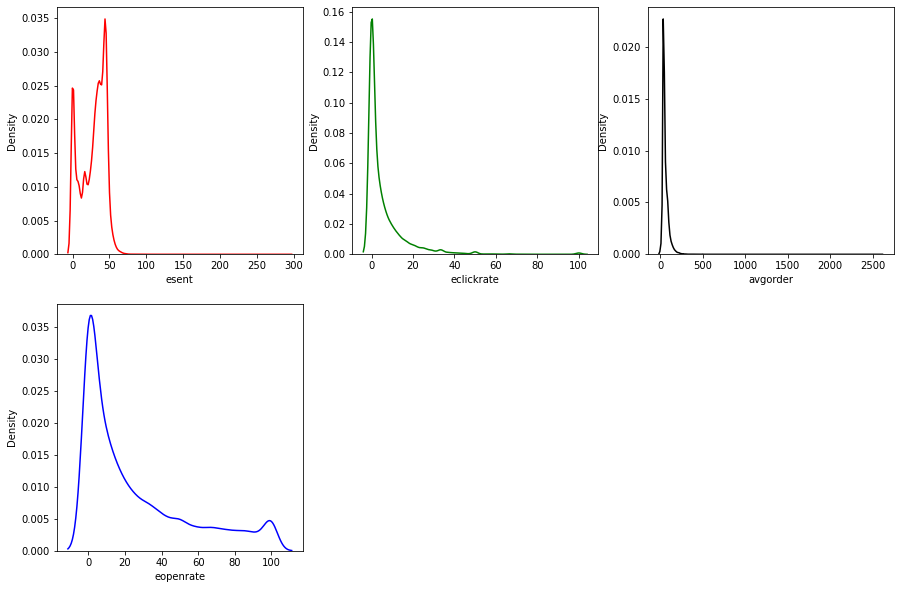

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(data1.esent,color='red');
plt.subplot(2,3,2)
sns.kdeplot(data1.eclickrate,color='green')
plt.subplot(2,3,3)
sns.kdeplot(data1.avgorder,color='black')
plt.subplot(2,3,4)
sns.kdeplot(data1.eopenrate,color='blue')
plt.show()

BoxPlot

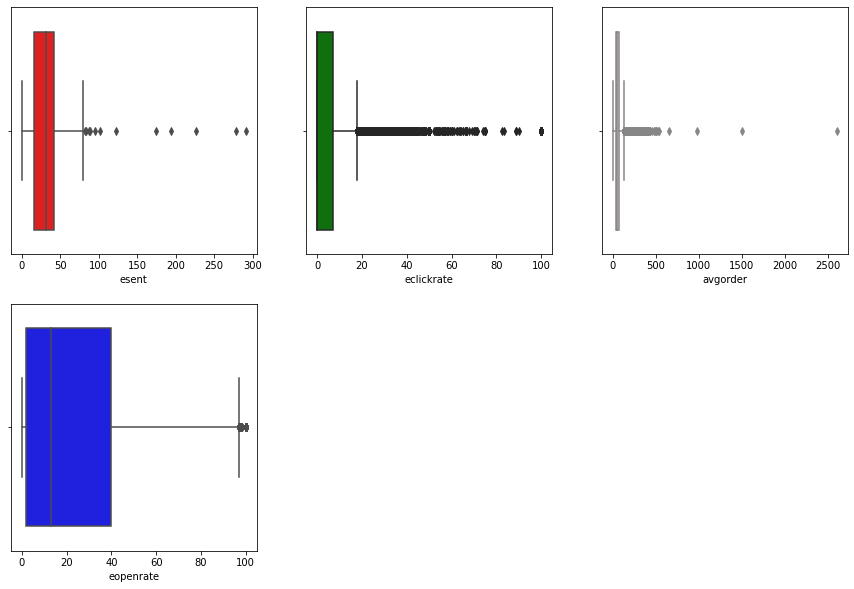

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x = data1.esent,color='red');
plt.subplot(2,3,2)
sns.boxplot(x = data1.eclickrate,color='green')
plt.subplot(2,3,3)
sns.boxplot(x = data1.avgorder,color='pink')
plt.subplot(2,3,4)
sns.boxplot(data1.eopenrate,color='blue')
plt.show()

Outliers Treatment

This is a function named impute that takes a pandas dataframe x as input and applies outlier treatment and negative value treatment on its columns. The function first calculates the interquartile range (IQR) of each column using the quantile() function and then defines the upper limit (UL) and lower limit (LL) of the column as 1.5 times the IQR added and subtracted from the third and first quartiles, respectively.

The function then iterates over each column of the dataframe and checks each value in the column against the defined UL and LL. If a value is greater than UL or less than LL, it replaces the value with the median value of that column. If a value is negative, it is replaced with zero. If a value is within the range of UL and LL, it is left unchanged. Finally, the function returns the modified dataframe x.

This function is useful for handling outliers and negative values in a dataset, which can otherwise affect the results of statistical analysis and machine learning algorithms.

In [39]:
def impute(x):
    for i in x.columns:
        iqr = 1.5*(x[i].quantile(0.75) - x[i].quantile(0.25))
        ul = x[i].quantile(0.75) + iqr
        ll = x[i].quantile(0.25) - iqr
        temp = []
        for j in x[i].index:
            if x[i][j] > ul or x[i][j] < ll :
                temp.append(np.median(x[i]))
            elif x[i][j] < 0:
                temp.append(0)
            else:
                temp.append(x[i][j])
        x[i]= temp
    return x

In [40]:
data1[['esent','eclickrate','avgorder','eopenrate']] = impute(data1[['esent','eclickrate','avgorder','eopenrate']])
#X_test[['esent','eclickrate','avgorder','eopenrate']] = impute(X_test[['esent','eclickrate','avgorder','eopenrate']])

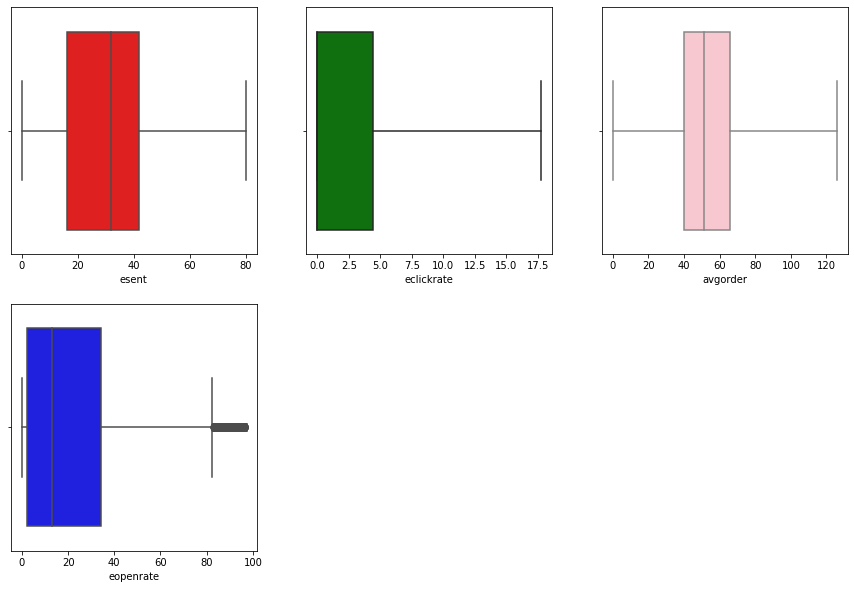

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x = data1.esent,color='red');
plt.subplot(2,3,2)
sns.boxplot(x = data1.eclickrate,color='green',whis=6)
plt.subplot(2,3,3)
sns.boxplot(x = data1.avgorder,color='pink',whis=3)
plt.subplot(2,3,4)
sns.boxplot(data1.eopenrate,color='blue')
plt.show()

Now we can see that there are not ouliers are present in our dataset that we will use for Models implementation. 

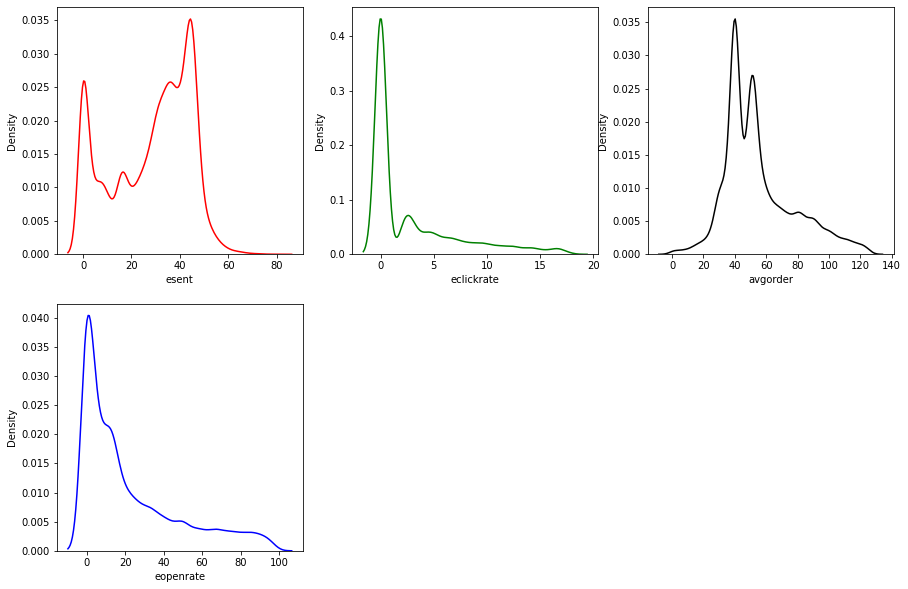

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.kdeplot(data1.esent,color='red');
plt.subplot(2,3,2)
sns.kdeplot(data1.eclickrate,color='green')
plt.subplot(2,3,3)
sns.kdeplot(data1.avgorder,color='black')
#plt.subplot(2,3,4)
#sns.kdeplot(xtrain.ordfreq,color='orange')
plt.subplot(2,3,4)
sns.kdeplot(data1.eopenrate,color='blue')
plt.show()

In [43]:
data1.describe()

,retained,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep,create_first,first_last
count,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000
mean,0.794520,28.091653,22.222346,2.776659,54.956543,0.649037,0.095094,0.038895,39.485471,89.371417
std,0.404059,16.505657,25.610391,4.313620,22.568219,0.477279,0.293350,0.193347,162.604677,243.153228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5036.000000,-5000.000000
25%,1.000000,16.000000,2.040816,0.000000,40.020000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,13.207547,0.000000,50.970000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,42.000000,34.210526,4.444444,66.030000,1.000000,0.000000,0.000000,22.000000,46.000000
max,1.000000,80.000000,96.875000,17.777778,125.630000,1.000000,1.000000,1.000000,2013.000000,3003.000000


<AxesSubplot:xlabel='create_first', ylabel='retained'>

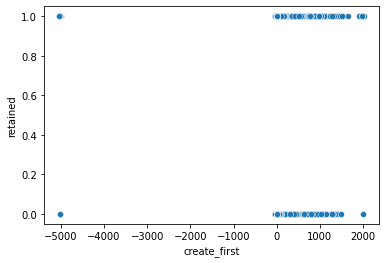

In [44]:
sns.scatterplot(x = data1.create_first, y = data1.retained)

<AxesSubplot:xlabel='first_last', ylabel='retained'>

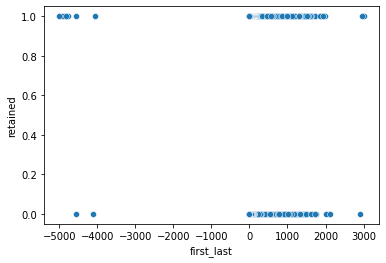

In [45]:
sns.scatterplot(x = data1.first_last, y = data1.retained)

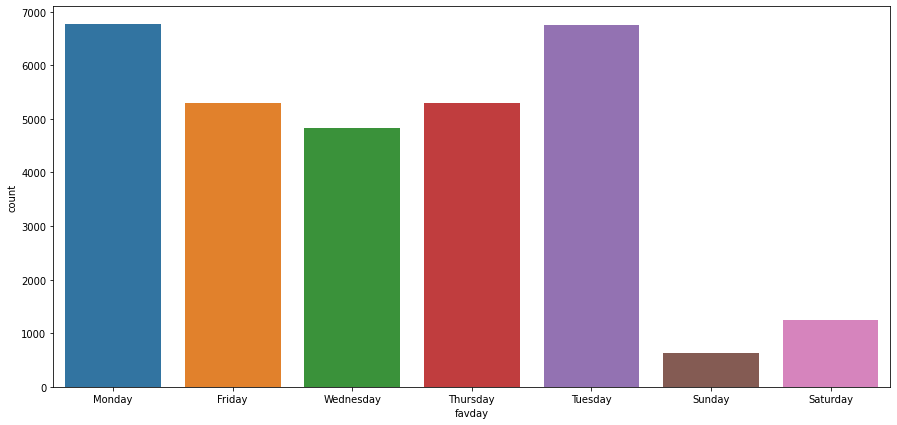

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(x = data1.favday)
plt.show()

<AxesSubplot:xlabel='city'>

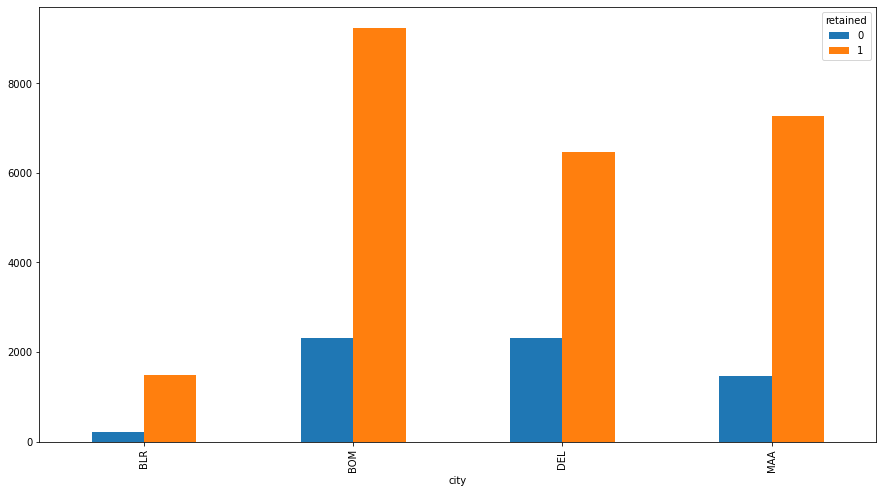

In [47]:
pd.crosstab(index=data1.city,columns=data1.retained).plot(kind='bar',figsize=(15,8))

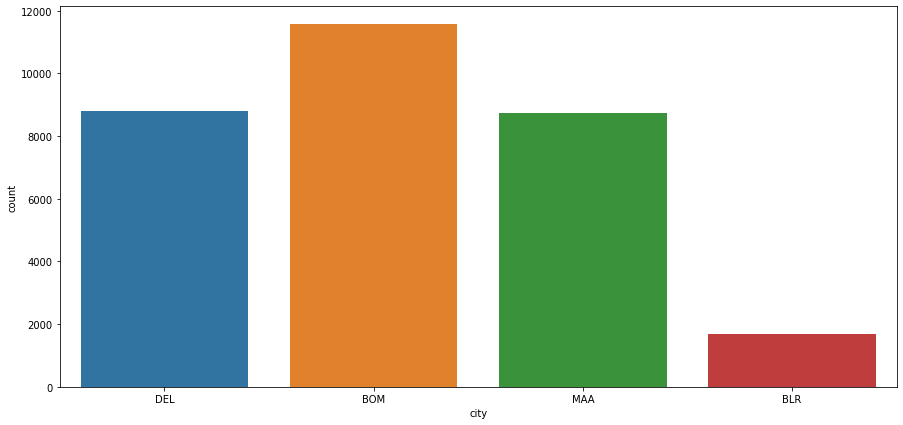

In [48]:
plt.figure(figsize=(15,7))
sns.countplot(x = data1.city)
plt.show()

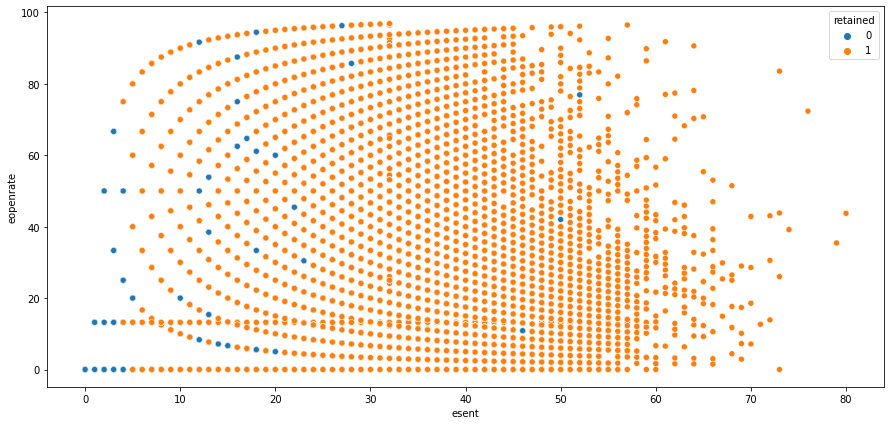

In [49]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= data1.esent, y = data1.eopenrate, hue= data1.retained)
plt.show()

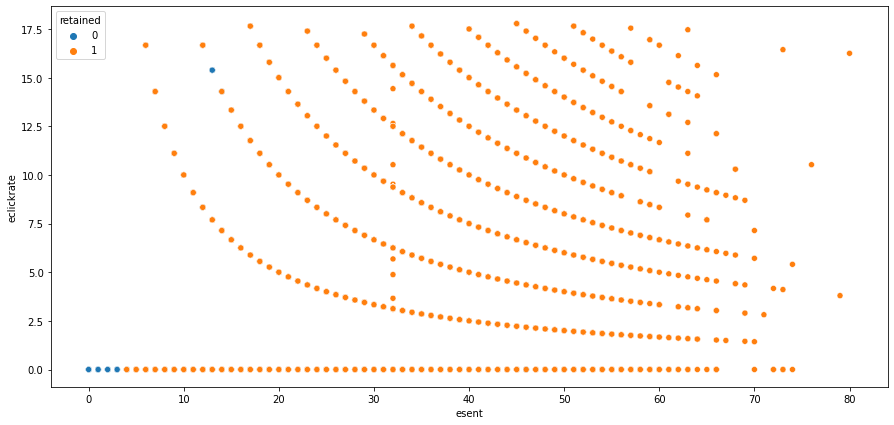

In [50]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= data1.esent, y = data1.eclickrate, hue= data1.retained)
plt.show()

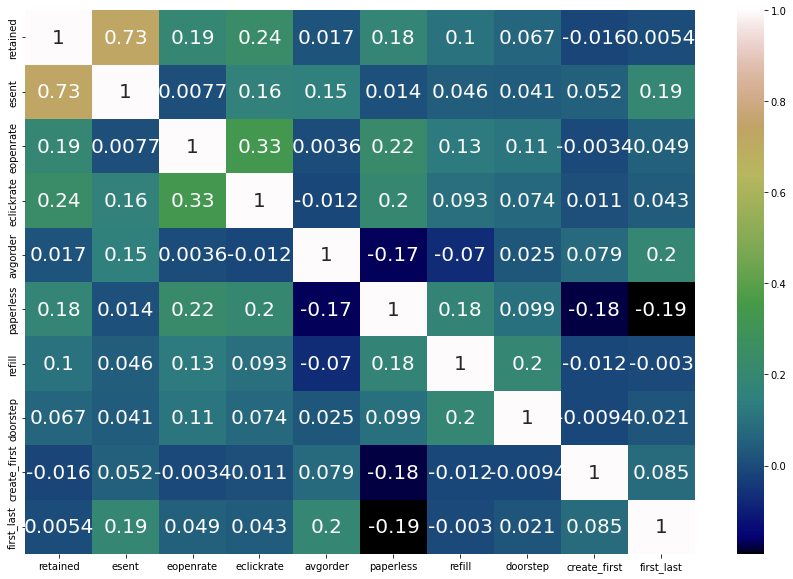

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(data1.corr(),annot=True,annot_kws={'size':20}, cmap = 'gist_earth');

Machine Learning Models

In [53]:
data1.head()

,custid,retained,esent,eopenrate,eclickrate,avgorder,paperless,refill,doorstep,favday,city,create_first,first_last
0,6H6T6N,0,29.0,13.207547,3.448276,14.52,0,0,0,Monday,DEL,317.0,0.0
1,APCENR,1,32.0,92.631579,10.526316,83.69,1,1,1,Friday,DEL,103.0,1024.0
2,7UP6MS,0,0.0,0.000000,0.000000,33.58,0,0,0,Wednesday,DEL,59.0,217.0
3,7ZEW8G,0,0.0,0.000000,0.000000,54.96,0,0,0,Thursday,BOM,157.0,0.0
4,8V726M,1,30.0,90.000000,13.333333,111.91,0,0,0,Monday,BOM,2.0,791.0


In [54]:
data1 = data1.drop(['create_first', 'first_last'], axis=1)

# Convert categorical variables into numerical variables
data1 = pd.get_dummies(data1, columns=['favday', 'city'])
                                       
# Set the custid column as the index
data1 = data1.set_index('custid')

# Split the dataset into training and testing sets
X = data1.drop('retained', axis=1)
y = data1['retained']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df = X_test_df.set_index(data1.index[X_test_df.index])

# Get predicted probabilities for all customers in the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Create a DataFrame with customer IDs and their corresponding predicted probabilities
churn_prob_df = pd.DataFrame({'custid': X_test_df.index, 'churn_prob': y_pred_prob})

# Sort the DataFrame in descending order of churn probability
churn_prob_df = churn_prob_df.sort_values('churn_prob', ascending=False)

# Get the top N customers with the highest predicted churn probability
N = 10
top_customers = churn_prob_df.head(N)['custid'].tolist()


In [55]:
top_customers

['WN3CWZ',
 '2TP9AK',
 'YR5BYQ',
 'CA5YKU',
 'YGQ6U8',
 '4PMRWM',
 'ZYNWWE',
 'FNJ7RK',
 'QMPEUE',
 'UDNXJP']

Based on the logistic regression model that we have trained, we have have identified the top 10 customers with the highest predicted churn probability. These customers are likely to churn or stop using your service/product in the near future.

The churn_prob_df DataFrame contains the customer IDs and their corresponding predicted probabilities of churn. The DataFrame is sorted in descending order of churn probability, and we have selected the top 10 customers with the highest predicted churn probability by using the head() function.

You can now use this information to target these customers with specific retention strategies, such as offering discounts, improving their user experience, or providing better customer support. By doing so, you may be able to prevent them from churning and retain their loyalty to your product/service.

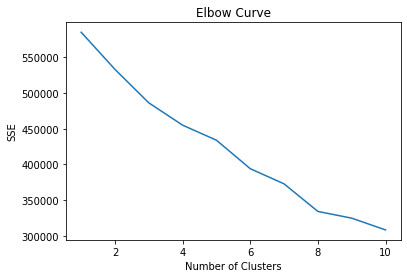

1    11566
2    10447
0     8788
Name: cluster, dtype: int64


In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data3 = data1.copy(deep = True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data3)

# Run KMeans with different number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Determine the optimal number of clusters
k = 3

# Train a KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Add the predicted clusters to the original data
data3['cluster'] = kmeans.predict(data_scaled)

# Print the number of customers in each cluster
print(data3['cluster'].value_counts())


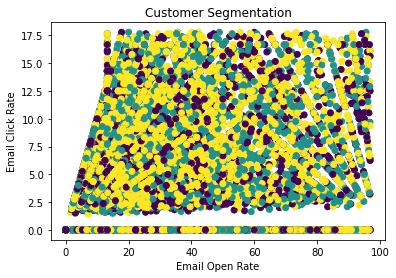

In [57]:
# Visualize the clusters
plt.scatter(data3['eopenrate'], data3['eclickrate'], c=data3['cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Email Open Rate')
plt.ylabel('Email Click Rate')
plt.show()

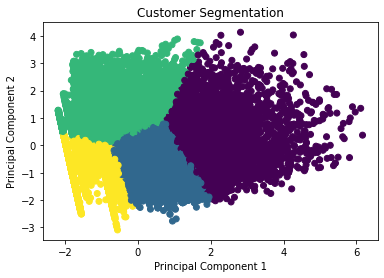

1    10979
2     8435
3     6064
0     5323
Name: cluster, dtype: int64


In [58]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select the columns to use for clustering
columns = ['esent', 'eopenrate', 'eclickrate', 'avgorder', 'paperless', 'refill', 'doorstep']

# Create a new DataFrame with only the selected columns
data4 = data1[columns].copy(deep=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data4)

# Perform PCA to reduce the number of dimensions
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_scaled)

# Run KMeans with the PCA-transformed data
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_pca)

# Add the predicted clusters to the original data
data4['cluster'] = kmeans.predict(data_pca)

# Visualize the clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation')
plt.show()

# Print the number of customers in each cluster
print(data4['cluster'].value_counts())


In [59]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import numpy as np

# Calculate silhouette score
silhouette_avg = silhouette_score(data_pca, kmeans.labels_)
print("Silhouette score:", silhouette_avg)

# Calculate within-cluster sum of squares
distances = pairwise_distances(data_pca, kmeans.cluster_centers_)
wcss = np.sum(distances ** 2, axis=1)
print("Within-cluster sum of squares:", wcss)

Silhouette score: 0.36448731737986995
Within-cluster sum of squares: [ 14.43876354 123.80228116  31.45934168 ...  33.17101483  19.48682387
  19.77071724]


The silhouette score measures the similarity of each data point to its assigned cluster compared to the other clusters, with scores ranging from -1 to 1. A higher silhouette score indicates that the clusters are well-separated and each data point is assigned to the correct cluster.

The within-cluster sum of squares (WCSS) measures the variability of data points within each cluster. Lower values of WCSS indicate more compact and well-separated clusters.

In [60]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# DBSCAN clustering
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)
dbscan_silhouette = silhouette_score(data_pca, dbscan_labels)
print("DBSCAN silhouette score:", dbscan_silhouette)


DBSCAN silhouette score: 0.6224127418286366


The DBSCAN clustering algorithm has a higher silhouette score of 0.6 compared to the K-Means algorithm that had a silhouette score of 0.36. This suggests that the DBSCAN algorithm has better defined clusters in the data than the K-Means algorithm.

The difference in performance can be attributed to the fact that K-Means algorithm works well for well-separated, spherical-shaped clusters, whereas DBSCAN is more suited to detect non-linearly separable clusters of arbitrary shapes. In this case, it is possible that the clusters in the data have more complex shapes, which is why DBSCAN performs better.

Additionally, the DBSCAN algorithm does not require the specification of the number of clusters in advance, unlike K-Means, which can be beneficial when the number of clusters is not known or when the clusters have different sizes or densities. However, the performance of DBSCAN may be sensitive to the choice of the distance metric and the parameter values for eps and min_samples. Therefore, it is important to experiment with different parameter values and evaluate the results visually and with other metrics before deciding on the best algorithm for a given dataset.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Select the columns to use for prediction
columns = ['esent', 'eopenrate', 'eclickrate', 'avgorder', 'paperless', 'refill', 'doorstep', 'retained']

# Create a new DataFrame with only the selected columns
data_rf = data1[columns].copy(deep=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_rf.iloc[:, :-1], data_rf.iloc[:, -1], test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model performance
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy score: 0.9464372666774874
Confusion matrix:
 [[1094  241]
 [  89 4737]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      1335
           1       0.95      0.98      0.97      4826

    accuracy                           0.95      6161
   macro avg       0.94      0.90      0.92      6161
weighted avg       0.95      0.95      0.95      6161



The random forest model achieved an accuracy score of 0.946, which means that it correctly classified 94.6% of the samples in the test set. The confusion matrix shows that out of 6161 samples, 1094 were true negatives (retained customers correctly classified as retained), 4737 were true positives (churned customers correctly classified as churned), 241 were false negatives (retained customers wrongly classified as churned), and 89 were false positives (churned customers wrongly classified as retained).

The precision score for class 0 (retained) is 0.92, which means that out of all samples predicted as retained, 92% were actually retained. The recall score for class 0 is 0.82, which means that out of all actual retained samples, 82% were correctly classified as retained. The F1-score for class 0 is 0.87, which is a harmonic mean of precision and recall scores.

The precision score for class 1 (churned) is 0.95, which means that out of all samples predicted as churned, 95% were actually churned. The recall score for class 1 is 0.98, which means that out of all actual churned samples, 98% were correctly classified as churned. The F1-score for class 1 is 0.97, which is a harmonic mean of precision and recall scores.

The classification report provides a summary of the precision, recall and F1-score for each class. The weighted average F1-score is 0.95, which means that the model achieved a good balance between precision and recall for both classes. In conclusion, the random forest model performed well in predicting customer retention, achieving a high accuracy and good precision, recall and F1-scores for both classes.

Strategies

Based on the analysis and predictive model, we have gained insights about our customer base and can develop effective customer retention strategies.

Firstly, we segmented our customers into different clusters based on their behavior, which can help us understand their needs and preferences better. We can then tailor our retention strategies to each cluster, such as offering promotions for high-spending customers or providing personalized recommendations for customers who are more likely to engage with our content.

Secondly, we identified key features that affect customer retention, such as email open rate, click rate, and average order size. We can use this information to improve our marketing campaigns and product offerings to increase customer satisfaction and loyalty.

Lastly, we developed a predictive model to identify customers who are at risk of churning. We can use this model to proactively reach out to these customers and offer them incentives to stay with us, such as exclusive discounts or rewards.

Overall, by using the insights from our analysis and predictive model, we can develop more targeted and effective retention strategies that will help us retain our valuable customers and grow our business.

Revenue Growth

To test the new retention strategies and measure their impact on customer retention rate and revenue growth, we can conduct an A/B test. We can randomly divide our customer base into two groups - a control group and a treatment group. The control group will receive the current retention strategies while the treatment group will receive the new retention strategies.

We can measure the impact of the new retention strategies on customer retention rate and revenue growth by comparing the retention rate and revenue growth of the treatment group with that of the control group. We can use statistical tests like t-tests or chi-square tests to determine whether the difference between the two groups is statistically significant.

If the new retention strategies result in a statistically significant improvement in customer retention rate and revenue growth, we can implement them across all customers. If the results are not statistically significant, we may need to reevaluate our strategies or make adjustments before implementing them on a larger scale.

Actionable Recommendations

Based on the analysis and model results, here are some actionable recommendations to improve customer retention and reduce churn rate in the long term:

Identify and target at-risk customers: Use the insights from the clustering analysis to identify customers who are at risk of churning. Develop targeted marketing campaigns to engage and retain these customers.

Improve customer experience: Analyze the feedback and complaints from customers to identify areas of improvement in the product or service. Address the issues and work towards providing a better customer experience.

Personalize communication: Use customer segmentation to personalize communication and offers. This will make the customers feel valued and increase their loyalty towards the brand.

Offer incentives: Offer incentives like loyalty rewards, discounts, or referral bonuses to encourage customers to continue using the product or service.

Focus on customer education: Educate customers on the benefits and value of the product or service. This will help in increasing their satisfaction and reduce the likelihood of churn.

Monitor customer behavior: Continuously monitor customer behavior and engagement metrics to identify changes in behavior and take proactive actions to retain the customers.

Regularly update and improve the product or service: Continuously work on updating and improving the product or service to meet the changing needs and preferences of the customers. This will help in keeping the customers engaged and reduce the likelihood of churn.